## Concrete Compressive Strength Prediction

### Data Description



*   The dataset was acquired from UCI Machine Learning Repository, which can be accessed at https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength. 
*   It comprises **1030 samples** and 9 attributes. 


*   The attributes consist of 8 inputs and 1 output. 
*    The **inputs** include Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, and Fine Aggregate, which are measured in kg/m3, along with the Age of the concrete sample in days.



*   The **output** attribute is the *Concrete Compressive Strength*, which is measured in Mega Pascal (MPa)








In [ ]:
# Importing necessary libraries for data analysis and visualization
import numpy as np  # library for mathematical operations
import pandas as pd  # library for data manipulation and analysis
import matplotlib.pyplot as plt  # library for creating visualizations
import seaborn as sns  # library for creating statistical graphics

%matplotlib inline  # magic command to display plots in Jupyter notebook

##### Loading the Data 

In [ ]:
# Loading the Excel file into a pandas dataframe
data = pd.read_excel("data/Concrete_Data.xls")

In [ ]:
# Displaying the first few rows of the dataframe
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

Simplifying Column names, since they appear to be too lengthy.

In [ ]:
# Renaming the columns of the dataframe to match the required column names
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

# Mapping the current column names to the required column names
mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)  # renaming the columns using the mapper dictionary

In [ ]:
data.head()

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CC_Strength  
0          676.0   28    79.986111  
1          676.0   28    61.887366  
2          594.0  270    40.269535  
3          594.0  365    41.052780  
4          825.5  360    44.296075

###### Checking for 'null' values

In [ ]:
# Checking for missing values in the dataframe
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

There are no null values in the data.

### EDA

Exploratory Data Analysis (EDA) is a process of analyzing and summarizing the main characteristics of the data to gain insights into the underlying patterns and relationships. 

In [ ]:
# Displaying basic statistics of the data
data.describe()

Cement  BlastFurnaceSlag       FlyAsh        Water  \
count  1030.000000       1030.000000  1030.000000  1030.000000   
mean    281.165631         73.895485    54.187136   181.566359   
std     104.507142         86.279104    63.996469    21.355567   
min     102.000000          0.000000     0.000000   121.750000   
25%     192.375000          0.000000     0.000000   164.900000   
50%     272.900000         22.000000     0.000000   185.000000   
75%     350.000000        142.950000   118.270000   192.000000   
max     540.000000        359.400000   200.100000   247.000000   

       Superplasticizer  CoarseAggregate  FineAggregate          Age  \
count       1030.000000      1030.000000    1030.000000  1030.000000   
mean           6.203112       972.918592     773.578883    45.662136   
std            5.973492        77.753818      80.175427    63.169912   
min            0.000000       801.000000     594.000000     1.000000   
25%            0.000000       932.000000     730.950000     7.000000   
50%            6.350000       968.000000     779.510000    28.000000   
75%           10.160000      1029.400000     824.000000    56.000000   
max           32.200000      1145.000000     992.600000   365.000000   

       CC_Strength  
count  1030.000000  
mean     35.817836  
std      16.705679  
min       2.331808  
25%      23.707115  
50%      34.442774  
75%      46.136287  
max      82.599225

##### Checking the pairwise relations of Features.

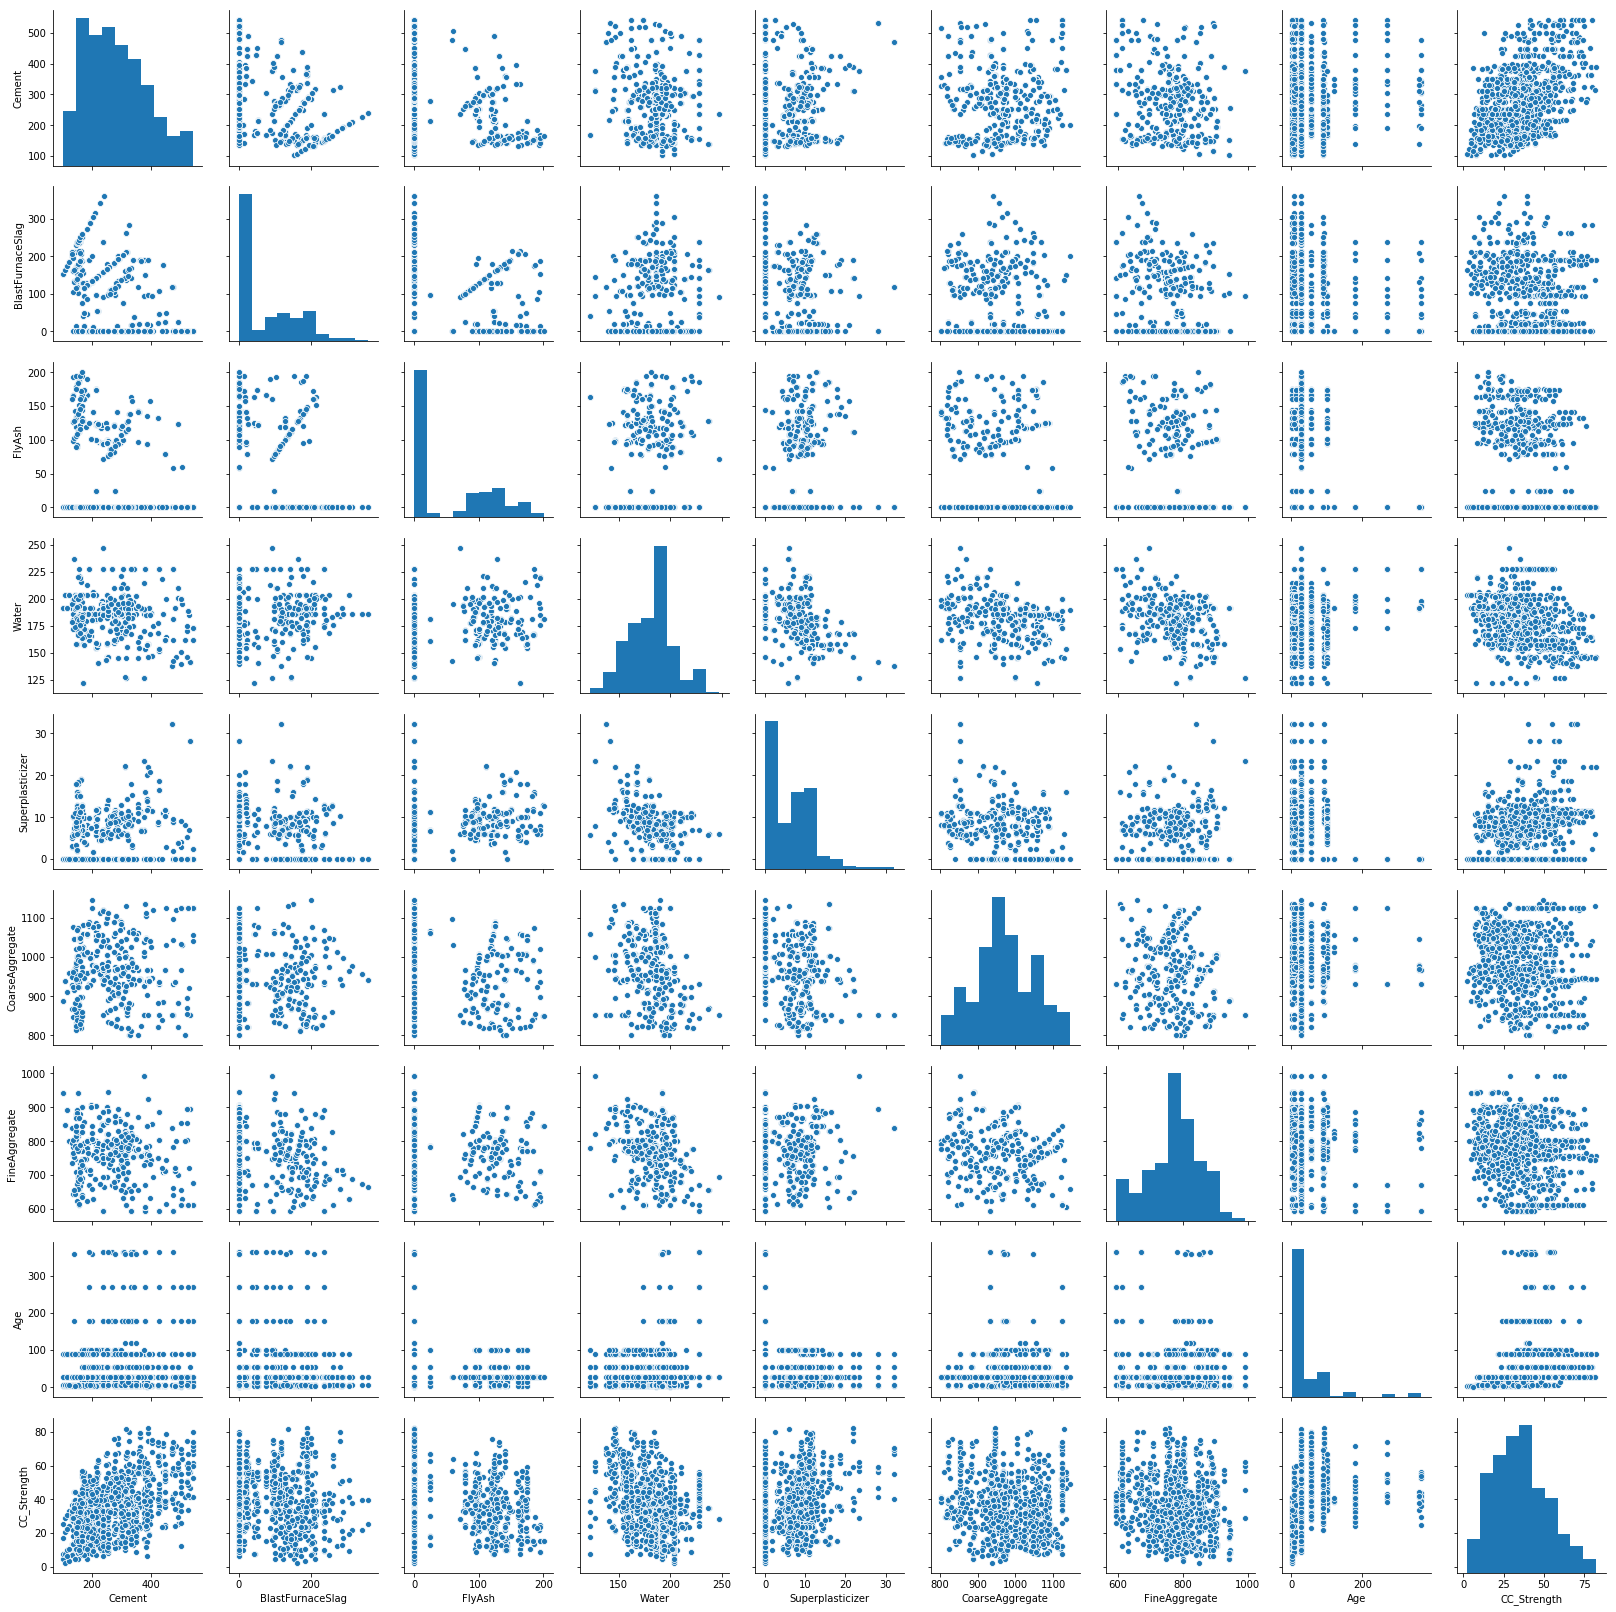

In [ ]:
# Creating a pairplot of the data to visualize the pairwise relationships between variables
sns.pairplot(data)
plt.show()

There seems to be no high correlation between independant variables (features). 

###Heat map plot

* A heatmap of the correlation matrix is a graphical representation of the correlation between different variables in a dataset. 
* It is a visual way to analyze the strength and direction of the relationship between variables.

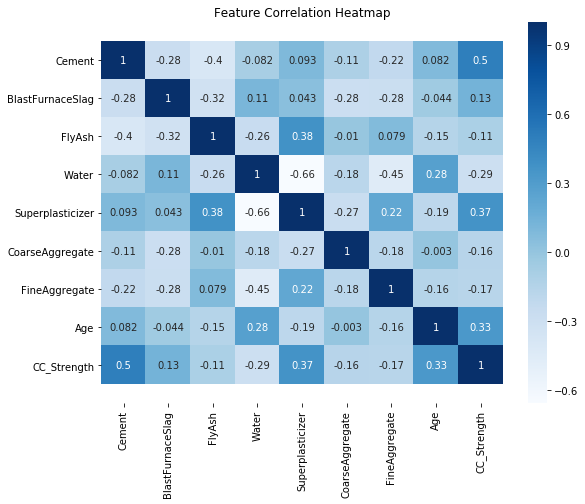

In [ ]:
# Calculating the correlation matrix between variables
corr = data.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')

# Adjusting the limits of the y-axis to fix cut-off labels
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)

# Adding a title to the plot
plt.title("Feature Correlation Heatmap")

plt.show()

### Observations from the heat map
* With the exception of **Cement**, which is expected to contribute to greater strength, there are no significant correlations between **Compressive strength** and other features.
* **Compressive Strength **is *strongly* correlated with two other features, namely **Age** and **Superplasticizer**.
* There appears to be a strong negative correlation between **Superplasticizer** and **Water**, while positive correlations exist between **Superplasticizer** and **Fly ash** as well as **Fine aggregate**.

We can further analyze these correlations visually by plotting these relations.

In [ ]:
# Access the column names of the 'data' dataframe
data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

Text(0.5, 1.0, 'Compressive Strength Distribution')

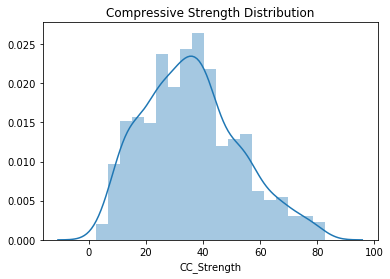

In [ ]:
# Create a distribution plot of Compressive Strength using Seaborn library
ax = sns.distplot(data.CC_Strength)

# Set the title of the plot
ax.set_title("Compressive Strength Distribution")

#### Observations from Strength vs (Cement, Age, Water)
* Compressive **strength increases with amount of cement**
* Compressive **strength increases with age**
* Cement with **low age** requires **more cement** for **higher strength**
* The **older the cement** is the **more water** it requires
* Concrete **strength increases** when **less water** is used in preparing it  

##### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)
* As **Flyash increases** the **strength decreases**
* **Strength increases** with **Super plasticizer**

##### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)
* **Strength decreases** with **increase in water**, **strength increases** with **increase in Super plasticizer** (already from above plots)
* **More Fine aggregate** is used when **less water**, **more Super plasticizer** is used.

### Data Preprocessing

Separating Input Features and Target Variable. 

In [ ]:
# Extract the features (all columns except the last) into variable X
X = data.iloc[:,:-1]

# Extract the target (last column) into variable y
y = data.iloc[:,-1]

##### Splitting data into Training and Test splits. 

In [ ]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using the train_test_split function
# We pass in X (the features) and y (the target), along with a test_size of 0.2 (20% of the data)
# and a random_state of 2 (to ensure reproducibility of the split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

##### Scaling 
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [ ]:
# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
sc = StandardScaler()

# Use the fit_transform method to standardize the training data
X_train = sc.fit_transform(X_train)

# Use the transform method to standardize the testing data (using the same scaling parameters as the training data)
X_test = sc.transform(X_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

### Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

#### Linear Regression

- The Go-to method for Regression problems. 
- The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function. 
- The objective function used in this case is Mean Squared Error. 
- There are three versions of Linear Regression
    - Linear Regression - No regularisation
    - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
    - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)
   
We will compare these three algorithms

In [ ]:
# Import the LinearRegression, Lasso, and Ridge classes from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Instantiate LinearRegression, Lasso, and Ridge objects
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# Fit the models on the training data
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions on the test data using each model
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

##### Evaluation

Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.


In [ ]:
# Importing necessary metrics from the sklearn library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Printing the header for the output table
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

# Printing the evaluation metrics for Linear Regression
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

# Printing the evaluation metrics for Lasso Regression
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

# Printing the evaluation metrics for Ridge Regression
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


The performance seem to be similar with all the three methods. 

##### Plotting the coefficients

* The Lasso Regression technique aims to minimize the coefficients of the model in order to simplify it. 
* Additionally, the coefficients obtained from Linear and Ridge Regression methods are nearly identical.




##### **Plotting Predictions**

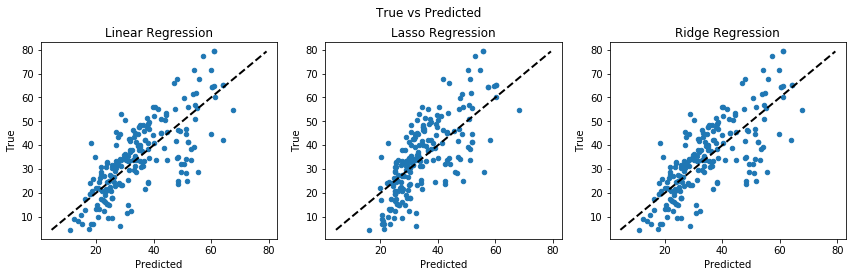

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

* Looking at the graphs between predicted and true values of the target variable, we can conclude that **Linear** and **Ridge** Regression perform **well** as the predictions are closer to the actual values.
* While **Lasso** Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)



#### **Decision Trees**

Given the abundance of zeros in some of the input features, as evidenced by their distributions in the pair plot, Decision Trees could be a more effective algorithm in this scenario. This is because Decision Trees are capable of constructing trees based on conditions derived from the input features, which can potentially enhance performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.53 		 56.69 		4.66 		0.77


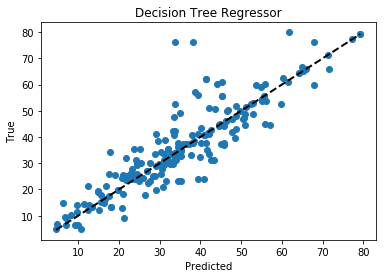

In [ ]:
# Importing the DecisionTreeRegressor module from the scikit-learn library
from sklearn.tree import DecisionTreeRegressor

# Creating an instance of the DecisionTreeRegressor class
dtr = DecisionTreeRegressor()

# Fitting the model to the training data
dtr.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dtr = dtr.predict(X_test)

# Printing the evaluation metrics of the model
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

# Creating a scatter plot to visualize the predicted and true values
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

The performance of the Decision Tree Regressor has significantly improved, as evidenced by the decrease in the Root Mean Squared Error (**RMSE**) from 10.29 to 7.31. This improvement can be observed in the plot, where more points align with the line, indicating better prediction accuracy.

 **Random Forest Regressor**

Since the use of a Decision Tree Regressor has resulted in improved performance, it is possible to further enhance it by ensembling more trees. The Random Forest Regressor algorithm can be utilized for this purpose, which trains multiple trees with randomly initialized values and subsets of data sampled from the training data. This approach can increase the robustness of the model and further improve its performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.08 		 25.85 		3.51 		0.89


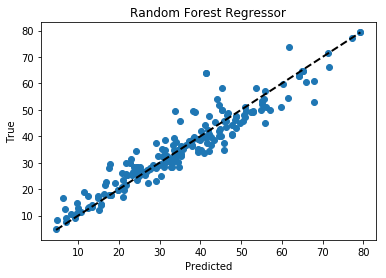

In [ ]:
# Importing the RandomForestRegressor module from the scikit-learn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the RandomForestRegressor class with 100 estimators
rfr = RandomForestRegressor(n_estimators=100)

# Fitting the model to the training data
rfr.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

# Printing the evaluation metrics of the model
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

The **RMSE** with Random Forest Regressor is now 5.11, we have reduced the error by ensembling multiple trees.

**Feature importances** for Decision Tree and Random Forest:

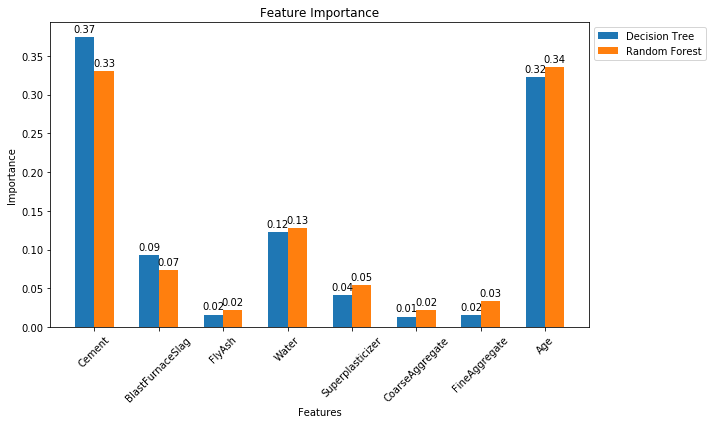

In [ ]:
# Get feature importances from decision tree and random forest models
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

# Define labels for x-axis
labels = req_col_names[:-1]

#Define x-axis range and bar width
x = np.arange(len(labels)) 
width = 0.3

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,6))

# Create two bar plots side-by-side, one for decision tree and one for random forest
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

# Define a function to add text labels to each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

* According to the bar chart displayed above, the tree-based models consider **Cement** and **Age** as the **most important features** when predicting the strength of concrete. 
* On the other hand, **Flyash**, **Coarse**, and **Fine aggregates** are regarded as the **least important factors** for this prediction task.

##### **Comparision**

In conclusion, it is time to compare the outcomes of all the implemented algorithms.

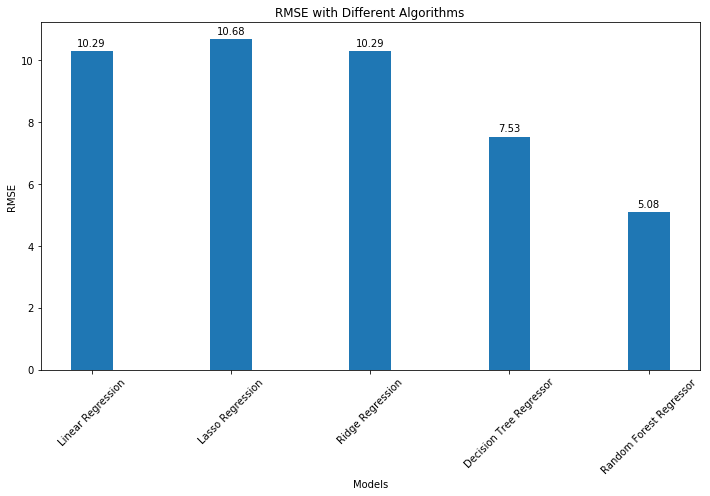

In [ ]:
# Define the models and their names
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]

# Calculate the RMSE values for each model on the test data and store them in a list
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

#Define x-axis range and bar width
x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

**Conclusion**

Based on the **RMSE** values obtained for the different algorithms, it can be concluded that the **Random Forest Regressor** is the most suitable method for solving this problem.

### References

1. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength